# Assignment 1 - Implementing k-means Clustering

**Harjidnder Singh Dhesi**
_0371098_

**Unsupervised Machine Learning**

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
np.random.seed(0)

In [2]:
# reading a csv file data into a pandas dataframe - seeds

seeds = pd.read_csv("Seed_Data.csv")

In [3]:
# viewing the seeds dataframe

seeds

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


The **features** in the data are as follows - 

area (A)

perimeter (P)

compactness (C)

length of kernel (LK)

width of kernel (WK)

asymmetry coefficient (A_Coef)

length of kernel groove (LKG)

The **label** field is - 

target

In [4]:
# viewing the summary of the data including count, min, max, mean, etc.

seeds.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [5]:
# checking if the data has any null values

seeds.isnull().sum()

A         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64

In [6]:
# a dataframe without the label field or the classes (target) 

X = seeds[['A','P','C','LK','WK','A_Coef','LKG']]

# storing labels in a separate dataframe

y = seeds['target']

In [7]:
X.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
205    2
206    2
207    2
208    2
209    2
Name: target, Length: 210, dtype: int64

In [9]:
# Convert Pandas dataframe to NumPy matrix

X_mat = X.values

### Customised function of Euclidean Distance formula 

In [10]:
# function that calculates distance between two coordinates based on Euclidean distance formula 

def eqld_dist(a, b):
    sum_sqrd = 0 
    for i in range(len(a)):
        sum_sqrd += math.pow(a[i]-b[i],2)
    dist = math.sqrt(sum_sqrd)
    return dist

In [11]:
# distance between first two coordinates from the seeds data using above function

print("euclidean distance:", eqld_dist(X_mat[0], X_mat[1]))

euclidean distance: 1.3335775230559335


### Customised function of Manhattan Distance formula 

In [12]:
# function that calculates distance between two coordinates based on Manhattan distance formula 

def mnhtn_dist(a, b):
    dist = 0
    for i in range(len(a)):
        dist += abs(a[i]-b[i])
    return dist

In [13]:
# distance between first two coordinates from the seeds data using above function

print("manhattan distance:", mnhtn_dist(X_mat[0], X_mat[1]))

manhattan distance: 2.357099999999998


### Distance using "cdist" function from numpy

In [14]:
# a function that uses cdist and a distance metric to find the distance between a data point and centroids
# Choice of distance metric -  Euclidean

def cdist_dist(X, centroids):
    for x in X:
        calcs = cdist(x.reshape([1,-1]), centroids, metric = 'euclidean').squeeze()
        print(calcs, "Cluster Membership: ", np.argmin(calcs))

In [15]:
# cdist_dist(X_mat, centroids)

In [16]:
# a function that uses cdist and a distance metric to find the distance between a data point and centroids
# Choice of distance metric -  Cityblock (Manhattan)

def cdist_dist(X, centroids):
    for x in X:
        calcs = cdist(x.reshape([1,-1]), centroids, metric = 'cityblock').squeeze()
        print(calcs, "Cluster Membership: ", np.argmin(calcs))

## K-means algorithm

**using Euclidean Distance Metric**

In [17]:
# k-means function whih takes the dataset and the number of centroids (K) as parameters 
# Choice of Distance metric - Euclidean

def k_means(X, K):
    # Keep track of history to see K-Means in action
    centroids_history = []
    labels_history = []
    
    # Randomly initializing K centroids
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    
    # While loop repeats process until difference between new/old centroids = 0 
    while True:
        # Euclidean distances are calculated for each point relative to centroids, and then np.argmin returns
        # the index location of the minimal distance - which cluster a point is assigned to
        labels = np.argmin(cdist(X, centroids, metric = 'euclidean'), axis=1)
        labels_history.append(labels)
        
        # Take mean of points within clusters to find new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(K)])
        centroids_history.append(new_centroids)
        
        # If old centroids and new centroids no longer change, K-Means is complete and end. Otherwise continue...
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

In [18]:
# the k_means function we created earlier applied on our X_mat matrix (formed from the seeds data) with 3 centroids

centroids, labels, centroids_history, labels_history = k_means(X_mat, 3)

In [19]:
# printing the labels generated 

print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1
 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
# viewing the seeds data with the new labels field attached to it

seeds['labels'] = labels

In [21]:
seeds

,A,P,C,LK,WK,A_Coef,LKG,target,labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,1
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2,0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2,0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2,0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2,0


In [22]:
# printing the centroids that we obtained from the k-means function

print(centroids)

[[11.98865854 13.28439024  0.85273659  5.22742683  2.88008537  4.58392683
   5.0742439 ]
 [14.81910448 14.53716418  0.88052239  5.59101493  3.29935821  2.70658507
   5.21753731]
 [18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
   6.06609836]]


### How well did the k-means algorithm perform?

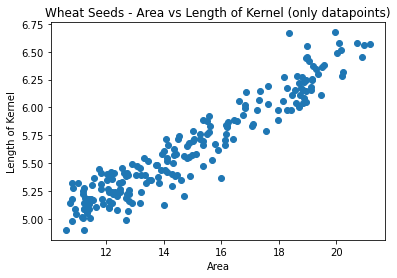

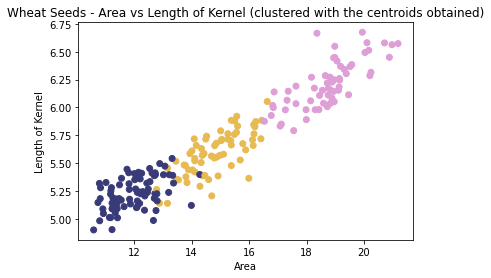

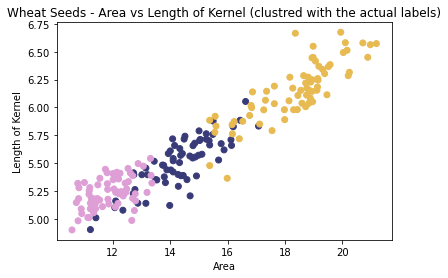

In [23]:
# See how well our implementation of K-Means did through plots

plt.scatter(X['A'], X['LK'])
plt.title('Wheat Seeds - Area vs Length of Kernel (only datapoints)')
plt.xlabel("Area")
plt.ylabel("Length of Kernel")
plt.show()

plt.scatter(X['A'], X['LK'], c = labels, cmap='tab20b')
plt.title('Wheat Seeds - Area vs Length of Kernel (clustered with the centroids obtained)')
plt.xlabel("Area")
plt.ylabel("Length of Kernel")
plt.show()

plt.scatter(X['A'], X['LK'], c = y, cmap='tab20b')
plt.title('Wheat Seeds - Area vs Length of Kernel (clustred with the actual labels)')
plt.xlabel("Area")
plt.ylabel("Length of Kernel")
plt.show()

By looking at the second (clusters obtained) and third (original clusters) plots above, it can be observed that all three classes have not been accurately classified entirely.

Refer to the Silhoutte score calculated below.

### Silhouette_score 

**Silhouette Score helps to understand how different our clusters are, which means how  similar the datapoints in one cluster are to each other.**

The value of the silhouette score ranges from -1 to 1. If the average score across the cluster is one, it means it is a perfect cluster (which is very rare).
If the average score across the cluster is close to one (or positive), it means the points are closer to the assigned cluster. If the score is 0, then the point lies on the boundary between the assigned cluster and the next closest cluster. And, if the average score across the cluster is negative then it indicates that a given point is assigned to an incorrect cluster.

**How is it calculated?**

The Silhouette score is calculated using the mean intra-cluster distance ( a ) and the mean nearest-cluster distance ( b ) for each sample. The Silhouette score for a sample is (b - a) / max(a, b) . To clarify, b is the distance between a sample and the nearest cluster centroid that the sample is not a part of and a is the distance between a sample and the cluster centroid that the sample is a part of.

In [24]:
# Calculate Silhouette Score

silhouette_score(X[['A','LK']], labels)

0.587570455089277

The value of the Silhoutte Score is positive and is close to one. Which means the model performed well, but not perfectly. Not all the data points are assigned to the accurate clusters.

## K-means algorithm

**using Manhattan Distance Metric**

In [25]:
# k-means function whih takes the dataset and the number of centroids (K) as parameters 
# Choice of Distance metric - Cityblock (Manhattan)

def k_means(X, K):
    # Keep track of history to see K-Means in action
    centroids_history = []
    labels_history = []
    
    # Randomly initializing K centroids
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    
    # While loop repeats process until difference between new/old centroids = 0 
    while True:
        # Manhattan distances are calculated for each point relative to centroids, and then np.argmin returns
        # the index location of the minimal distance - which cluster a point is assigned to
        labels = np.argmin(cdist(X, centroids, metric = 'cityblock'), axis=1)
        labels_history.append(labels)
        
        # Take mean of points within clusters to find new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(K)])
        centroids_history.append(new_centroids)
        
        # If old centroids and new centroids no longer change, K-Means is complete and end. Otherwise continue...
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

In [26]:
# the k_means function we created earlier, on our X_mat matrix (formed from the seeds data) with 3 centroids

m_centroids, m_labels, centroids_history, labels_history = k_means(X_mat, 3)

In [27]:
# printing the labels generated 

print(m_labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
# printing the centroids that we obtained from the k-means function

print(m_centroids)

[[11.9813253  13.27975904  0.85288554  5.22473494  2.87968675  4.49066265
   5.0659759 ]
 [18.74916667 16.31266667  0.88470667  6.21521667  3.72333333  3.61438333
   6.0758    ]
 [14.9041791  14.5741791   0.88116119  5.60337313  3.31183582  2.79782388
   5.23389552]]


### How well did the k-means algorithm perform?

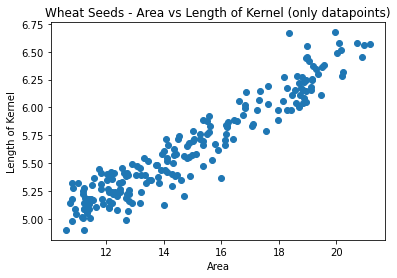

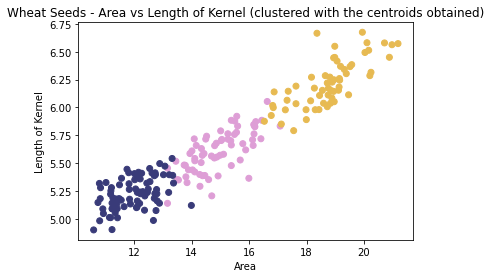

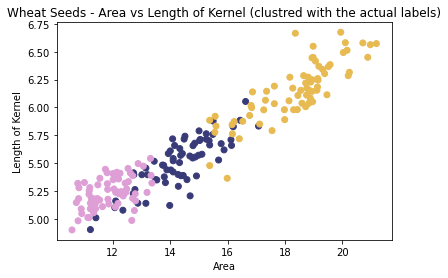

In [29]:
# See how well our implementation of K-Means did through plots

plt.scatter(X['A'], X['LK'])
plt.title('Wheat Seeds - Area vs Length of Kernel (only datapoints)')
plt.xlabel("Area")
plt.ylabel("Length of Kernel")
plt.show()

plt.scatter(X['A'], X['LK'], c = m_labels, cmap='tab20b')
plt.title('Wheat Seeds - Area vs Length of Kernel (clustered with the centroids obtained)')
plt.xlabel("Area")
plt.ylabel("Length of Kernel")
plt.show()

plt.scatter(X['A'], X['LK'], c = y, cmap='tab20b')
plt.title('Wheat Seeds - Area vs Length of Kernel (clustred with the actual labels)')
plt.xlabel("Area")
plt.ylabel("Length of Kernel")
plt.show()

By looking at the second (clusters obtained) and third (original clusters) plots above, it can be observed that one of the three classes has been almost accurately classified however the other two are not.

Refer to the Silhoutte score calculated below.

### Silhouette_score

In [30]:
# Calculate Silhouette Score

silhouette_score(X[['A','LK']], m_labels)

0.6068441467372373

The observation from the plots remains the same that not all the clusters are well identified.

The value of the Silhoutte Score is positive and is close to one. Which means the model performed well, but not perfectly. Not all the data points are assigned to the accurate clusters.

The value of the score obtained here is higher than the previous one, which means, this model performed better, even if it is still not perfect.